In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
tasa_suicidios = pd.read_csv("master.csv", header="infer", sep=",")
tasa_suicidios.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
tasa_suicidios.shape

(27820, 12)

In [4]:
tasa_suicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
tasa_suicidios.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [11]:
null_summary = (
    tasa_suicidios.isna().sum().reset_index()
    .rename(columns={"index": "variable", 0: "count"})
    .assign(percent = lambda x: 100 * x["count"] / tasa_suicidios.shape[0])
    .sort_values(by="count", ascending=True)
)

print(null_summary)

              variable  count    percent
0              country      0   0.000000
1                 year      0   0.000000
2                  sex      0   0.000000
3                  age      0   0.000000
4          suicides_no      0   0.000000
5           population      0   0.000000
6    suicides/100k pop      0   0.000000
7         country-year      0   0.000000
9    gdp_for_year ($)       0   0.000000
10  gdp_per_capita ($)      0   0.000000
11          generation      0   0.000000
8         HDI for year  19456  69.935298


🚧 Solo la varible HDI for year tiene datos faltantes, con un porcentaje de 69,9%

In [ ]:
## Calcular promedio de año y país para llenar los datos faltantes
tasa_suicidios['HDI for year'] = tasa_suicidios.groupby(['country', 'year'])['HDI for year'].transform(lambda x: x.fillna(x.mean()))

In [10]:
missing_values_after = tasa_suicidios['HDI for year'].isnull().sum()
missing_values_after

np.int64(19456)

🚧 Aunque se intentó sacar promedio de año y país para eliminar los datos faltantes siguen habiendo muchos datos a los cuales no se pudo sacar un promedio, por tanto, se tomó la decisión de eliminar esta columna

In [27]:
tasa_suicidios.drop(columns=['HDI for year'], inplace=True)

In [4]:
tasa_suicidios.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [14]:
tasa_suicidios.duplicated().sum()

np.int64(0)

🚧 No existen datos duplicados

In [17]:
tasa_suicidios.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [16]:
tasa_suicidios.describe(include="object")

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Austria,male,15-24 years,Uzbekistan2014,"63,067,077,179",Generation X
freq,382,13910,4642,12,12,6408


In [25]:
suicidios_por_pais = tasa_suicidios.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(10)
print("Total de suicidios por país (Top 10):")
print(suicidios_por_pais)

Total de suicidios por país (Top 10):
country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64


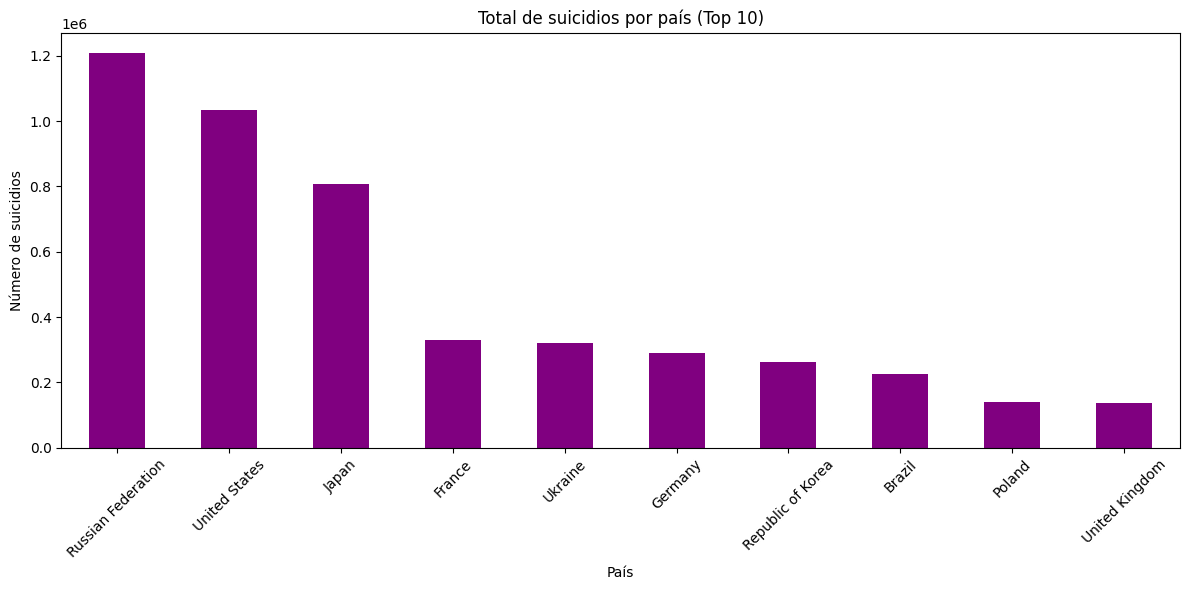

In [28]:
# Graficar los 10 países con más suicidios
plt.figure(figsize=(12, 6))
suicidios_por_pais.plot(kind='bar', color='purple') 
plt.title('Total de suicidios por país (Top 10)')
plt.xlabel('País')
plt.ylabel('Número de suicidios')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


In [29]:
suicidios_tiempo = tasa_suicidios.groupby('year')['suicides/100k pop'].mean()
print("tasa de suicidios en el tiempo")
print(suicidios_tiempo)

tasa de suicidios en el tiempo
year
1985    11.826198
1986    11.423333
1987    11.644213
1988    12.709405
1989    12.879071
1990    12.862956
1991    13.438880
1992    13.498564
1993    13.833705
1994    14.073272
1995    15.662671
1996    15.305422
1997    14.954361
1998    14.926920
1999    14.532038
2000    13.941328
2001    13.519138
2002    13.786550
2003    13.205019
2004    12.481944
2005    12.068442
2006    11.927461
2007    12.025339
2008    11.907686
2009    11.400787
2010    11.215900
2011    11.015349
2012    11.421718
2013    11.107958
2014    11.011464
2015    11.094073
2016    13.421187
Name: suicides/100k pop, dtype: float64


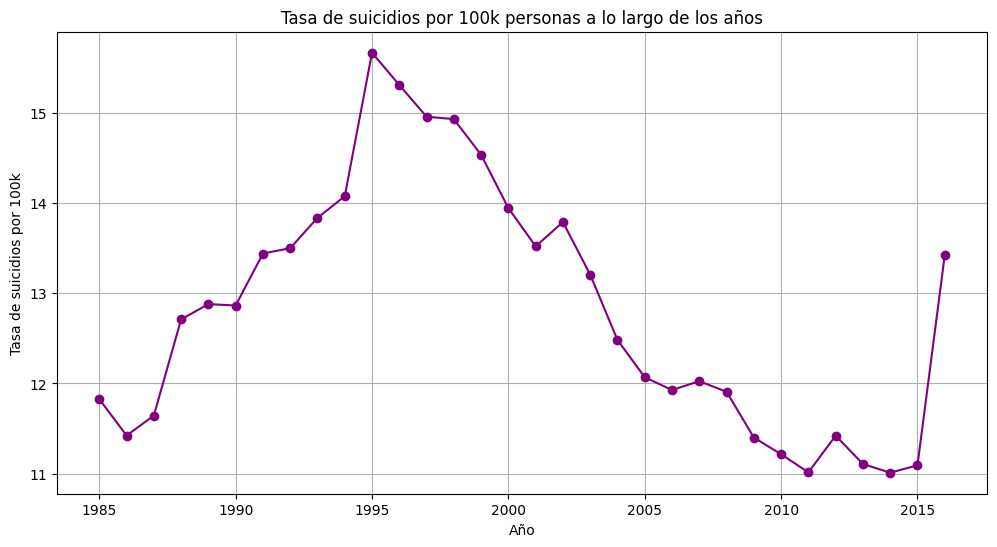

In [31]:
# Graficar la tendencia a lo largo del tiempo
plt.figure(figsize=(12, 6))
suicidios_tiempo.plot(kind='line', marker='o', color='purple')
plt.title('Tasa de suicidios por 100k personas a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Tasa de suicidios por 100k')
plt.grid()
plt.show()

In [6]:
suicidios_por_genero = tasa_suicidios.groupby('sex')['suicides_no'].sum()
print("\nTotal de suicidios por género:")
print(suicidios_por_genero)


Total de suicidios por género:
sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64


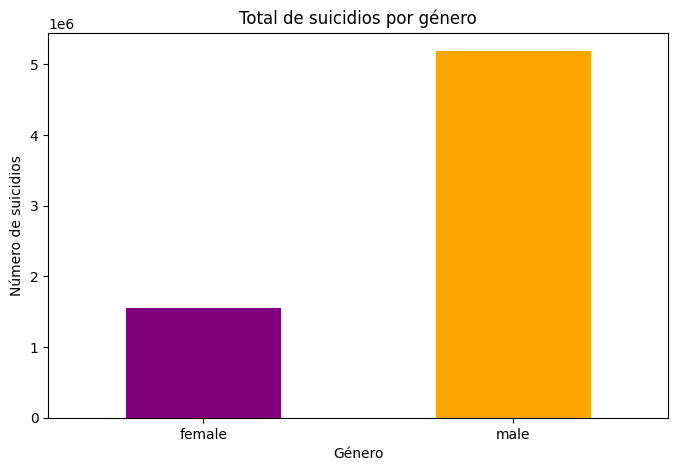

In [7]:
plt.figure(figsize=(8, 5))
suicidios_por_genero.plot(kind='bar', color=['purple', 'orange'])
plt.title('Total de suicidios por género')
plt.xlabel('Género')
plt.ylabel('Número de suicidios')
plt.xticks(rotation=0)
plt.show()

In [44]:
orden_generaciones = ['Generation Z', 'Millennials', 'Generation X', 'Boomers', 'Silent', 'G.I. Generation']
tasa_suicidios['generation'] = pd.Categorical(tasa_suicidios['generation'], categories=orden_generaciones, ordered=True)
suicidios_por_generacion = tasa_suicidios.groupby('generation')['suicides_no'].sum()

print("Suicidios por generación (ordenados cronológicamente):")
print(suicidios_por_generacion)


Suicidios por generación (ordenados cronológicamente):
generation
Generation Z         15906
Millennials              0
Generation X       1532804
Boomers            2284498
Silent             1781744
G.I. Generation     510009
Name: suicides_no, dtype: int64


C:\Users\carol\AppData\Local\Temp\ipykernel_37604\2093603075.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suicidios_por_generacion = tasa_suicidios.groupby('generation')['suicides_no'].sum()


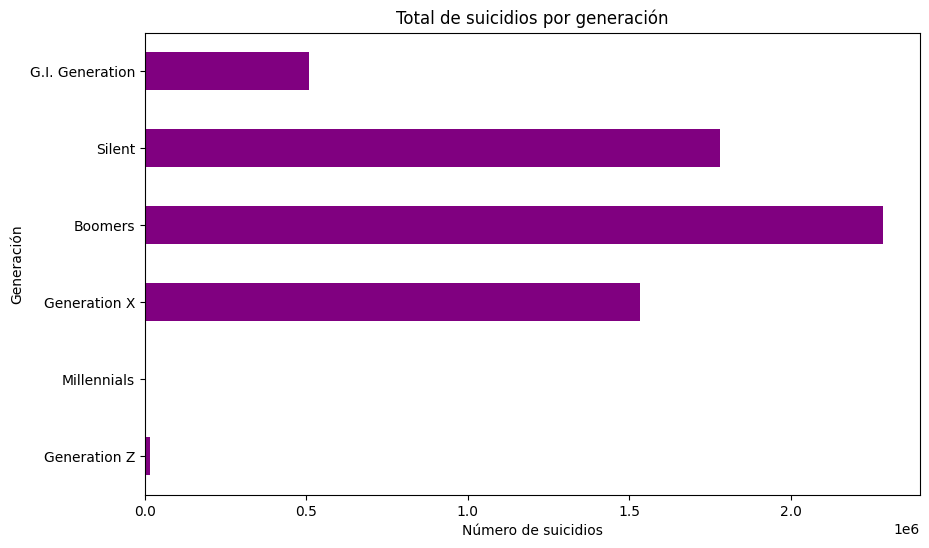

In [47]:
# Gráfico de barras horizontales para suicidios por generación
plt.figure(figsize=(10, 6))
suicidios_por_generacion.plot(kind='barh', color='purple')
plt.title('Total de suicidios por generación')
plt.xlabel('Número de suicidios')
plt.ylabel('Generación')
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_74156\723916428.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mapa_calor = tasa_suicidios.groupby(['year', 'age'])['suicides_no'].sum().unstack()


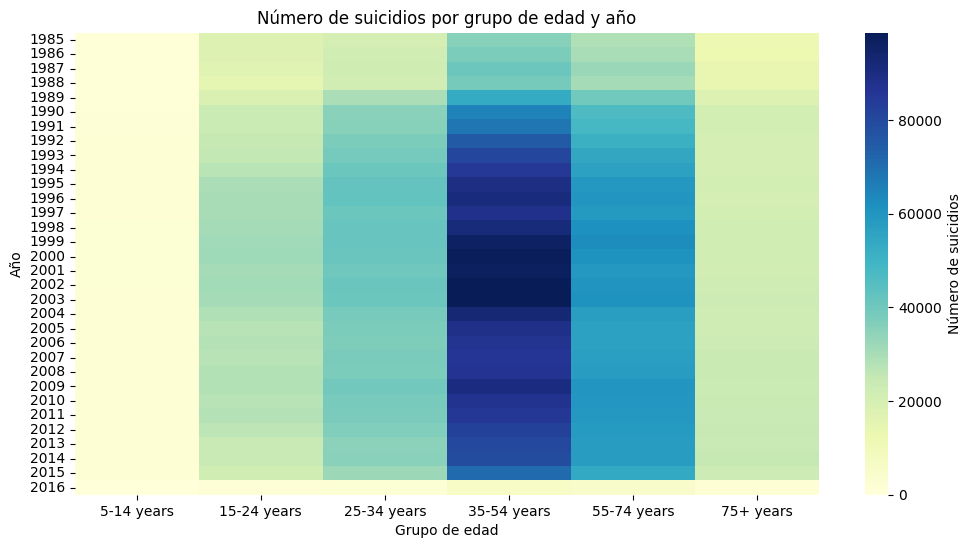

In [29]:
# Ordena los grupos de edad antes de usar `unstack()`
tasa_suicidios['age'] = pd.Categorical(tasa_suicidios['age'], categories=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], ordered=True)

# Agrupa y crea el mapa de calor nuevamente
mapa_calor = tasa_suicidios.groupby(['year', 'age'])['suicides_no'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(mapa_calor, cmap="YlGnBu", cbar_kws={'label': 'Número de suicidios'})
plt.title('Número de suicidios por grupo de edad y año')
plt.xlabel('Grupo de edad')
plt.ylabel('Año')
plt.show()


C:\Users\carol\AppData\Local\Temp\ipykernel_74156\2240407876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tasa_suicidios, x='generation', y='suicides_no', palette='viridis')


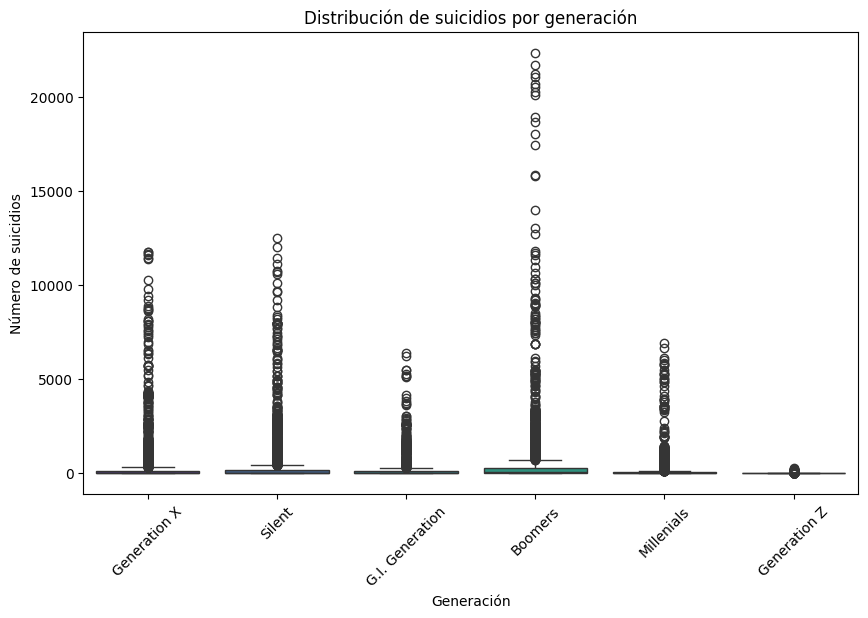

In [38]:
# Gráfico de caja y bigotes para suicidios por generación
plt.figure(figsize=(10, 6))
sns.boxplot(data=tasa_suicidios, x='generation', y='suicides_no', palette='viridis')
plt.title('Distribución de suicidios por generación')
plt.xlabel('Generación')
plt.ylabel('Número de suicidios')
plt.xticks(rotation=45)
plt.show()